In [1]:
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import mlab
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

In [2]:
MAE_r = pd.read_csv("../reports/result_data/Platinum_RMAE_tlconfmmfftotal.csv",header = None)
MAE_r.columns = ["mol_id","R_MAE"]
MAE_a = pd.read_csv("../reports/result_data/Platinum_AMAE_tlconfmmff_total.csv", header = None)
MAE_a.columns = ["mol_id","A_MAE"]
MAE = pd.merge(MAE_r,MAE_a, on = "mol_id")
MAE.head()

,mol_id,R_MAE,A_MAE
0,1,0.5179399083426688,0.487884
1,2,0.5630232797411736,1.824205
2,3,0.11265077703865245,0.157619
3,4,1.2310489213559777,0.780676
4,5,0.05626773714902811,1.385017


In [3]:
df = MAE.copy()
df_10 = df[df["mol_id"] <= 25]
df_11 = df[(df["mol_id"] <= 53) &(df["mol_id"] > 25) ] 
df_12 = df[(df["mol_id"] <= 74) &(df["mol_id"] > 53) ]

/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


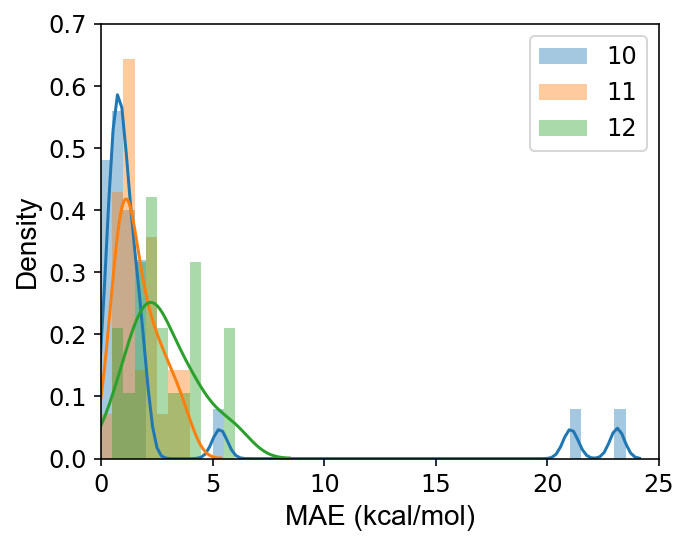

In [26]:
### A_MAE
f = plt.figure(figsize=(5,4))
ax = plt.gca()
sns.distplot(df_10["A_MAE"],bins = 50, norm_hist = True, kde_kws= {"clip":(0,25)},hist_kws={"range":(0,25)})
sns.distplot(df_11["A_MAE"],bins = 50, norm_hist = True, kde_kws= {"clip":(0,25)},hist_kws={"range":(0,25)})
sns.distplot(df_12["A_MAE"],bins = 50, norm_hist = True, kde_kws= {"clip":(0,25)},hist_kws={"range":(0,25)})
ax.legend(labels=["10","11","12"],fontsize = 12)
plt.xlim((0,25))
plt.ylim((0,0.7))
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel("Density",size = 14, fontname="Arial")
plt.xlabel("MAE (kcal/mol)", size = 14,fontname="Arial");
#plt.savefig("A_MAE_Platinum_1015.pdf",dpi = 300)

/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "
/Users/jianinglu1/anaconda/lib/python3.6/site-packages/matplotlib/axes/_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


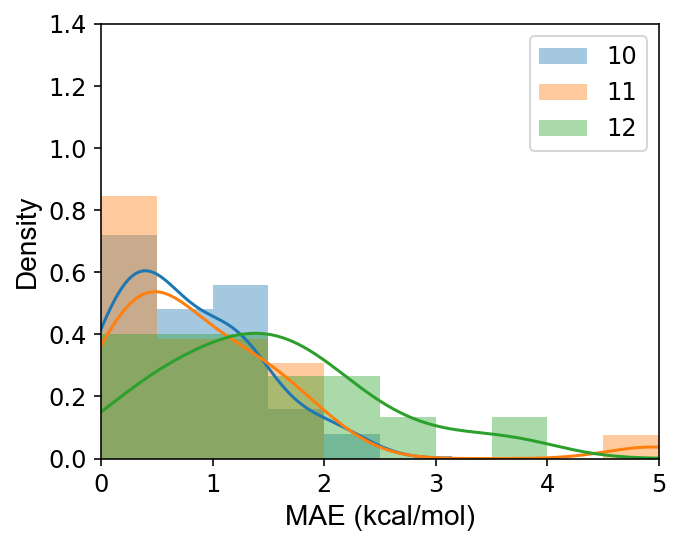

In [19]:
### R_MAE
f = plt.figure(figsize=(5,4))
ax = plt.gca()
df_11_new = df_11[df_11["R_MAE"] != "None"]
df_12_new = df_12[df_12["R_MAE"] != "None"]
sns.distplot(df_10["R_MAE"].astype(float),bins = 10, norm_hist = False, kde_kws= {"clip":(0,5)},hist_kws={"range":(0,5)})
sns.distplot(df_11_new["R_MAE"].astype(float),bins = 10, norm_hist = True, kde_kws= {"clip":(0,5)},hist_kws={"range":(0,5)})
sns.distplot(df_12_new["R_MAE"].astype(float),bins = 10, norm_hist = True, kde_kws= {"clip":(0,5)},hist_kws={"range":(0,5)})
plt.xlim(0,5)
plt.ylim(0,1.4)
ax.legend(labels=["10","11","12"],fontsize = 12)
plt.xticks(size = 12)
plt.yticks(size = 12)
plt.ylabel("Density",size = 14, fontname="Arial");
plt.xlabel("MAE (kcal/mol)", size = 14,fontname="Arial");
#plt.savefig("R_MAE_Platinum_1015.pdf",dpi = 300);